<center><u><H1>Logistic Regression</H1></u></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Plotting Sigmoid function:

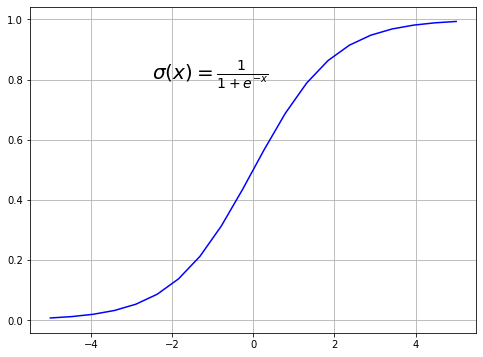

In [2]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
x = np.linspace(-5,5,20)
plt.grid()
ax.text(-2.5,0.8,r'$\sigma(x)=\frac{1}{1+e^{-x}}$',fontsize=20)
plt.plot(x, sigmoid(x),'b')

## Loading the data:

In [3]:
df=pd.read_csv("../data\iris_dataset.csv")
df.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Preprocessing the data:

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['Iris-setosa','Iris-versicolor','Iris-virginica'])
y = le.transform(df['Class']) 
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['PetalLength','PetalWidth']], y, test_size=0.3, random_state= 2019)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [7]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
X_test_std[0,:]

array([0.60272765, 0.33264192])

## Creating the Model

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression(C=1000.0, solver='lbfgs', multi_class='auto')

In [12]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Class prediction:

In [13]:
np.round(lr.predict_proba(X_test_std[0,:].reshape(1, -1)))

array([[0., 1., 0.]])

In [14]:
lr.score(X_test_std, y_test)

0.9777777777777777

## Metrics:

In [15]:
from sklearn import metrics

In [16]:
print(f"Accuracy:{metrics.accuracy_score(y_test, lr.predict(X_test_std))}")

Accuracy:0.9777777777777777


In [17]:
print(f"Confusion matrix:\n{metrics.confusion_matrix(y_test, lr.predict(X_test_std))}")

Confusion matrix:
[[17  0  0]
 [ 0 16  1]
 [ 0  0 11]]


In [18]:
print(f"Classification report:\n{metrics.classification_report(y_test, lr.predict(X_test_std))}")

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## computing the score 5 consecutive times (with different splits each time)

In [19]:
from sklearn.model_selection import cross_val_score
X = df[['PetalLength','PetalWidth']]
y = df['Class']
scores = cross_val_score(lr, X, y, cv=5, scoring='f1_macro')
scores

array([0.96658312, 0.96658312, 0.93265993, 0.89974937, 1.        ])

## Predictions by cross-validation:

In [20]:
from sklearn.model_selection import cross_val_predict
X = df[['PetalLength','PetalWidth']]
y = df['Class']
predicted = cross_val_predict(lr, X, y, cv=10)
metrics.accuracy_score(y, predicted) 

0.9533333333333334

## Avoiding overfitting via regularization:
Overfitting is a common problem in machine learning, where a model performs well on training data but does not generalize well to unseen data like test data.
C  is directly related to the regularization parameter wich is its inverse.
Decreasing the value of C means that we are increasing the regularization strength.

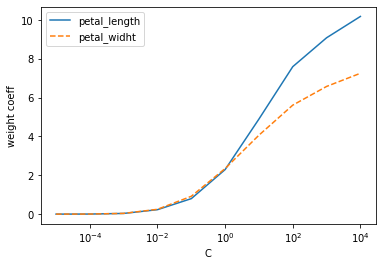

In [21]:
weights, params = [], []
for n in range(-5,5):
    lr_ = LogisticRegression(C=10**n, solver='lbfgs',multi_class='auto')
    lr_.fit(X_train_std, y_train)
    weights.append(lr_.coef_[2])#coef_ : array, shape (n_classes, n_features)
    params.append(10**n)
weights = np.array(weights)
plt.plot(params, weights[:,0], label='petal_length')
plt.plot(params, weights[:,1], label='petal_widht', linestyle='--')

plt.ylabel('weight coeff')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='best')

## Reference: 
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
